In [1]:
import numpy as np
import os
import cv2
import mglearn
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def load_point_cloud(id):
    data = np.fromfile('research/{}.bin'.format(id), np.float32).reshape((-1, 4))
    return data

In [3]:
pc = load_point_cloud('004786')[:, :3]  # concat intensity

In [4]:
print('Data:', pc)
print('Shape:', pc.shape)

Data: [[35.356  0.174  1.405]
 [46.259  0.308  1.773]
 [46.402  0.601  1.778]
 ...
 [ 3.76  -1.422 -1.758]
 [ 3.771 -1.42  -1.763]
 [ 4.023 -1.502 -1.886]]
Shape: (118825, 3)


In [5]:
def visualize_pc(pc):
    fig = pyplot.figure()
    ax = Axes3D(fig)
    ax.view_init(azim=-180, elev=45)
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_zlim(0, 8)
    ax.scatter(pc[:, 0], pc[:, 1], pc[:, 2], s=1)

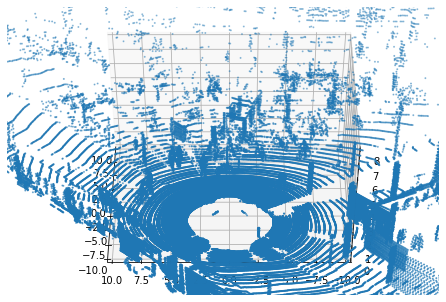

In [6]:
visualize_pc(pc)

In [7]:
# Method 1: Remove all z<-1.5 coords
pc2 = pc
z_axis = pc2[:, 2]
excluded_indexes = np.where(z_axis < -1.5)
pc_no_zero_z_points = np.zeros((51364, 3))

for i in range(3):
    pc_no_zero_z_points[:, i] = np.delete(pc2[:, i], excluded_indexes)
print(pc_no_zero_z_points.shape)
print(pc.shape)

(51364, 3)
(118825, 3)


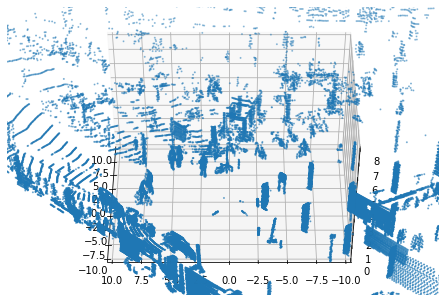

In [8]:
visualize_pc(pc_no_zero_z_points)

In [9]:
# Method 2: use DBSCAN clustering to remove ground points

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


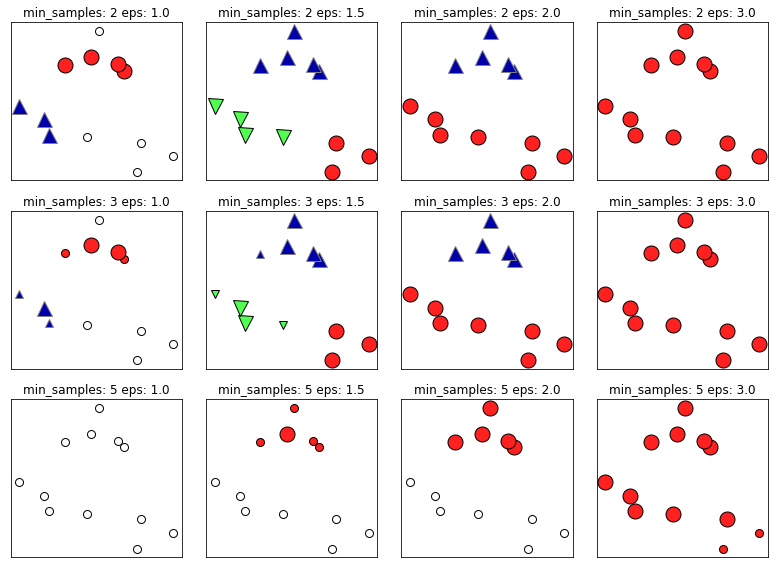

In [10]:
mglearn.plots.plot_dbscan()

In [13]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

Text(0, 0.5, 'Feature 1')

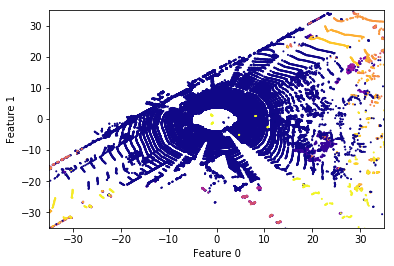

In [12]:
pc3 = pc
YZ = pc3[:, 1:]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(pc3)

dbscan = DBSCAN(eps=0.2, min_samples=3)
clusters = dbscan.fit_predict(X_scaled)

pyplot.scatter(pc3[:, 0], pc3[:, 1], c=clusters, cmap="plasma", s=1)
pyplot.axis([-35, 35, -35, 35])
pyplot.xlabel("Feature 0")
pyplot.ylabel("Feature 1")